# Plot parameter results for I-FGSM and DeepFool

## Import results

In [8]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

ATTACK_METHOD = 'IFGSM'
epsilons = np.array([0.005, 0.01, 0.015, 0.02, 0.025, 0.03])
steps = np.array([2, 4, 6, 8, 10, 15, 20, 25])
with open("experiment_results/orig_Accuracy_" + ATTACK_METHOD + "_eps["+str(min(epsilons))+"-"+str(max(epsilons))+ "]_steps["+str(min(steps))+"-"+str(max(steps))+ "].npy", 'rb') as fp:
    orig_IFGSM_Accuracy_arr = pickle.load(fp)
with open("experiment_results/orig_Target_Accuracy_" + ATTACK_METHOD + "_eps["+str(min(epsilons))+"-"+str(max(epsilons))+ "]_steps["+str(min(steps))+"-"+str(max(steps))+ "].npy", 'rb') as fp:
    orig_IFGSM_Target_Accuracy_arr = pickle.load(fp)
with open("experiment_results/orig_Mean_Similarity_" + ATTACK_METHOD + "_eps["+str(min(epsilons))+"-"+str(max(epsilons))+ "]_steps["+str(min(steps))+"-"+str(max(steps))+ "].npy", 'rb') as fp:
    orig_IFGSM_mean_similarity_arr = pickle.load(fp)
with open("experiment_results/orig_Std_Similarity_" + ATTACK_METHOD + "_eps["+str(min(epsilons))+"-"+str(max(epsilons))+ "]_steps["+str(min(steps))+"-"+str(max(steps))+ "].npy", 'rb') as fp:
    orig_IFGSM_std_similarity_arr = pickle.load(fp)
with open("experiment_results/orig_Mean_Steps_" + ATTACK_METHOD + "_eps["+str(min(epsilons))+"-"+str(max(epsilons))+ "]_steps["+str(min(steps))+"-"+str(max(steps))+ "].npy", 'rb') as fp:
    orig_IFGSM_mean_steps_arr = pickle.load(fp)
with open("experiment_results/orig_Mean_Epsilon_" + ATTACK_METHOD + "_eps["+str(min(epsilons))+"-"+str(max(epsilons))+ "]_steps["+str(min(steps))+"-"+str(max(steps))+ "].npy", 'rb') as fp:
    orig_IFGSM_mean_epsilons_arr = pickle.load(fp)

ATTACK_METHOD = "DeepFool"
overshoots = np.array([0.005, 0.01, 0.015, 0.02, 0.025, 0.03])
max_iters = np.array([2, 4, 6, 8, 10, 12])

with open("experiment_results/Accuracy_" + ATTACK_METHOD + "_overshoot["+str(min(overshoots))+"-"+str(max(overshoots))+ "]_maxiter["+str(min(max_iters))+"-"+str(max(max_iters))+ "].npy", 'rb') as fp:
    DeepFool_Accuracy_arr_new = pickle.load(fp)
with open("experiment_results/Mean_Similarity_" + ATTACK_METHOD + "_overshoot["+str(min(overshoots))+"-"+str(max(overshoots))+ "]_maxiter["+str(min(max_iters))+"-"+str(max(max_iters))+ "].npy", 'rb') as fp:
    DeepFool_mean_similarity_arr_new = pickle.load(fp)
with open("experiment_results/Std_Similarity_" + ATTACK_METHOD + "_overshoot["+str(min(overshoots))+"-"+str(max(overshoots))+ "]_maxiter["+str(min(max_iters))+"-"+str(max(max_iters))+ "].npy", 'rb') as fp:
    DeepFool_std_similarity_arr_new = pickle.load(fp)

## Plot results

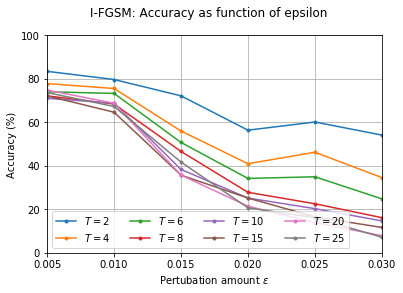

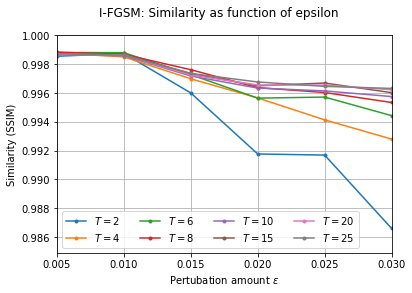

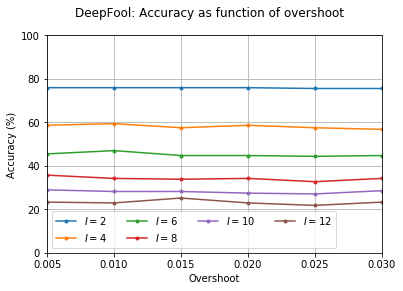

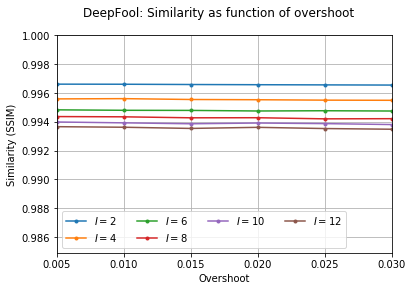

In [20]:
def plot_ifgsm_accuracy(epsilons, steps, data):
    fig, ax = plt.subplots()
    lines = ax.plot(epsilons, data, '.-')
    ax.set_xlabel('Pertubation amount $\epsilon$')
    ax.set_ylabel('Accuracy (%)')
    ax.set_xlim([epsilons[0], epsilons[-1]])
    ax.set_ylim([0, 100])
    ax.legend(iter(lines), ['$T='+str(step)+'$' for step in steps], loc='lower left', ncol=4)
    ax.grid('on')
    return fig

def plot_ifgsm_similarity(epsilons, steps, means, stds):
    fig, ax = plt.subplots()
    lines = ax.plot(epsilons, means, '.-')
    k = 1
#     for i in range(means.shape[1]):
#         ax.fill_between(epsilons, means[:,i]+k*stds[:,i], means[:,i]-k*stds[:,i], alpha=0.2)
    ax.set_xlabel('Pertubation amount $\epsilon$')
    ax.set_ylabel('Similarity (SSIM)')
    ax.set_xlim([epsilons[0], epsilons[-1]])
    ax.set_ylim([0.9849, 1])
    ax.legend(iter(lines), ['$T='+str(step)+'$' for step in steps], loc='lower left', ncol=4)
    ax.grid('on')
    return fig
    
def plot_deepfool_accuracy(overshoots, max_iters, data):
    fig, ax = plt.subplots()
    lines = ax.plot(overshoots, data, '.-')
    ax.set_xlabel('Overshoot')
    ax.set_ylabel('Accuracy (%)')
    ax.set_xlim([overshoots[0], overshoots[-1]])
    ax.set_ylim([0, 100])
    ax.legend(iter(lines), ['$I='+str(it)+'$' for it in max_iters], loc='lower left', ncol=4)
    ax.grid('on')
    return fig

def plot_deepfool_similarity(overshoots, max_iters, means, stds):
    fig, ax = plt.subplots()
    lines = ax.plot(overshoots, means, '.-')
    k = 1
#     for i in range(means.shape[1]):
#         ax.fill_between(overshoots, means[:,i]+k*stds[:,i], means[:,i]-k*stds[:,i], alpha=0.2)
    ax.set_xlabel('Overshoot')
    ax.set_ylabel('Similarity (SSIM)')
    ax.set_xlim([overshoots[0], overshoots[-1]])
    ax.set_ylim([0.9849, 1])
    ax.legend(iter(lines), ['$I='+str(it)+'$' for it in max_iters], loc='lower left', ncol=4)
    ax.grid('on')
    return fig
    
fig = plot_ifgsm_accuracy(epsilons, steps, orig_IFGSM_Accuracy_arr)
fig.suptitle('I-FGSM: Accuracy as function of pertubation amount')
plt.savefig('res_ifgsm_acc.pdf')

fig = plot_ifgsm_similarity(epsilons, steps, orig_IFGSM_mean_similarity_arr, orig_IFGSM_std_similarity_arr)
fig.suptitle('I-FGSM: Similarity as function of pertubation amount')
plt.savefig('res_ifgsm_sim.pdf')

fig = plot_deepfool_accuracy(overshoots, max_iters, DeepFool_Accuracy_arr_new)
fig.suptitle('DeepFool: Accuracy as function of overshoot')
plt.savefig('res_deepfool_acc.pdf')

fig = plot_deepfool_similarity(overshoots, max_iters, DeepFool_mean_similarity_arr_new, DeepFool_std_similarity_arr_new)
fig.suptitle('DeepFool: Similarity as function of overshoot')
plt.savefig('res_deepfool_sim.pdf')

plt.show()